In [43]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

sns.set(rc={'figure.figsize': [8, 8]}, font_scale=1.2)

In [2]:
train_df = pd.read_csv('New folder/train.csv')
test_df = pd.read_csv('New folder/test.csv')
combine = [train_df, test_df]


In [3]:
print("Training Dataset Info:")
print(train_df.info())
print("\nTesting Dataset Info:")
print(test_df.info())

Training Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

Testing Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0  

In [4]:
# Check for missing values in the training dataset
print("\nMissing Values in Training Dataset:")
print(train_df.isnull().sum())


Missing Values in Training Dataset:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


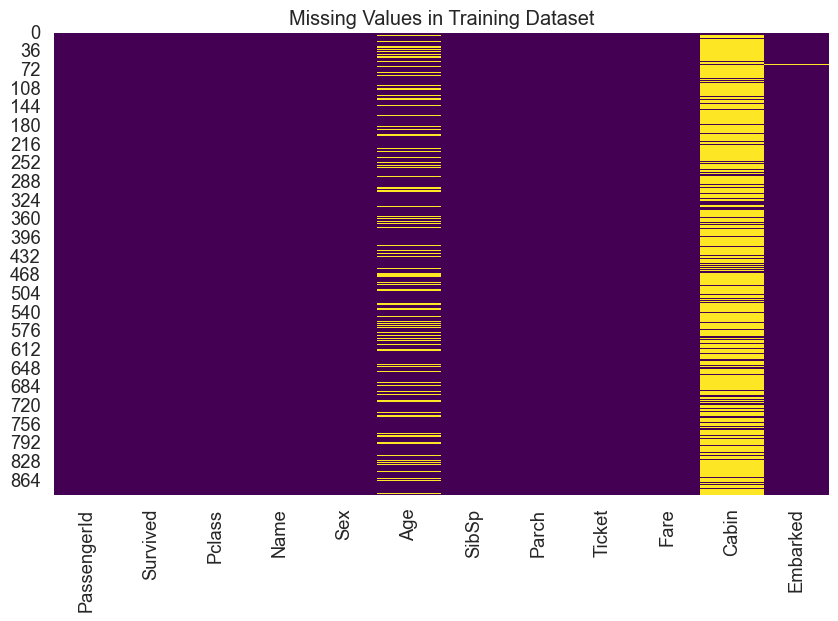

In [5]:
plt.figure(figsize=(10, 6))
sns.heatmap(train_df.isnull(), cmap='viridis', cbar=False)
plt.title('Missing Values in Training Dataset')
plt.show()

In [6]:
# Check for missing values in the testing dataset
print("\nMissing Values in Testing Dataset:")
print(test_df.isnull().sum())


Missing Values in Testing Dataset:
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [7]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [9]:
train_df[['Survived','Pclass']].groupby(['Pclass'],as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [10]:
train_df[["Sex", "Survived"]].groupby(['Sex'],as_index=False).mean().sort_values(by='Sex',ascending=False)

,Sex,Survived
1,male,0.188908
0,female,0.742038


In [11]:
train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [12]:
# Handle missing values in the 'Age' column
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
test_df['Age'].fillna(test_df['Age'].median(), inplace=True)

# Handle missing values in the 'Embarked' column
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)

# Drop the 'Cabin' column
train_df.drop('Cabin', axis=1, inplace=True)
test_df.drop('Cabin', axis=1, inplace=True)

# Verify that missing values have been handled
print("Missing Values After Handling:")
print(train_df.isnull().sum())


Missing Values After Handling:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [13]:
train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


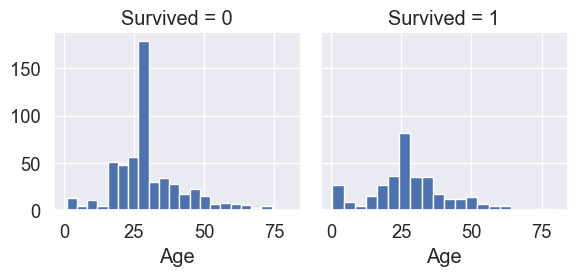

In [14]:
g=sns.FacetGrid(train_df,col='Survived')
g.map(plt.hist, 'Age',bins=20)

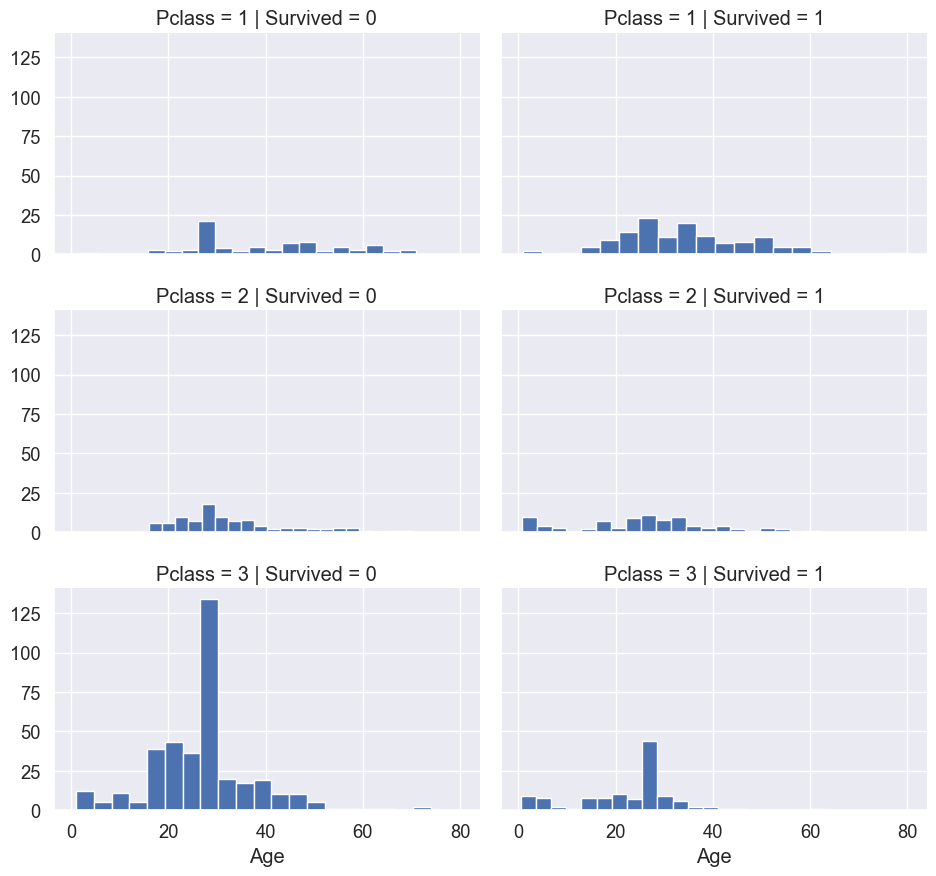

In [15]:
grid=sns.FacetGrid(train_df,col='Survived',row='Pclass',aspect=1.6)
grid.map(plt.hist,'Age',bins=20)

In [16]:
numeric_stats = train_df.describe()

In [17]:
print(numeric_stats)

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.361582    0.523008   
std     257.353842    0.486592    0.836071   13.019697    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   22.000000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   35.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


# Univariate Analysis

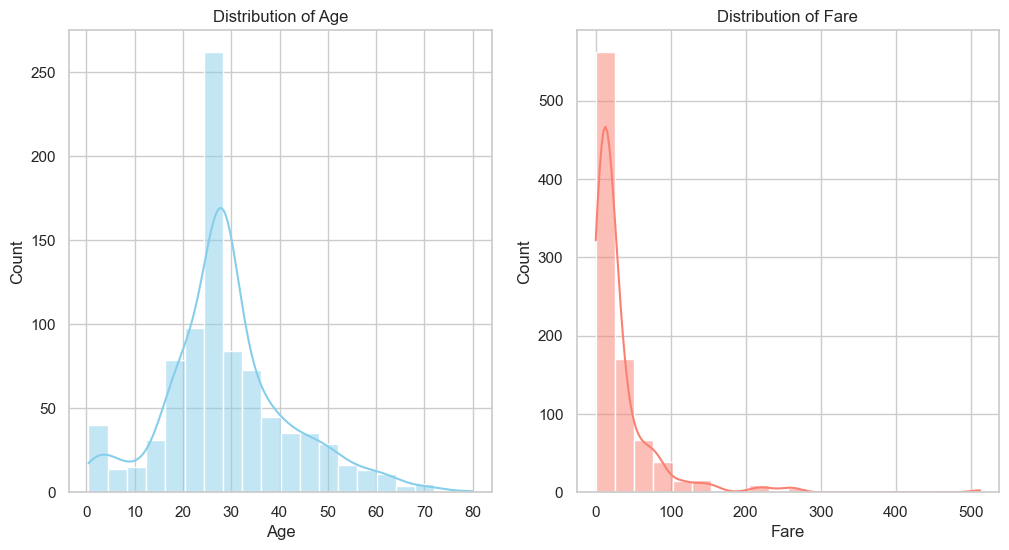

In [20]:
# Set the style for Seaborn plots
sns.set(style="whitegrid")

# Univariate analysis for numerical variables (e.g., 'Age' and 'Fare')
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(train_df['Age'].dropna(), kde=True, bins=20, color='skyblue')
plt.title('Distribution of Age')

plt.subplot(1, 2, 2)
sns.histplot(train_df['Fare'], kde=True, bins=20, color='salmon')
plt.title('Distribution of Fare')

plt.show()

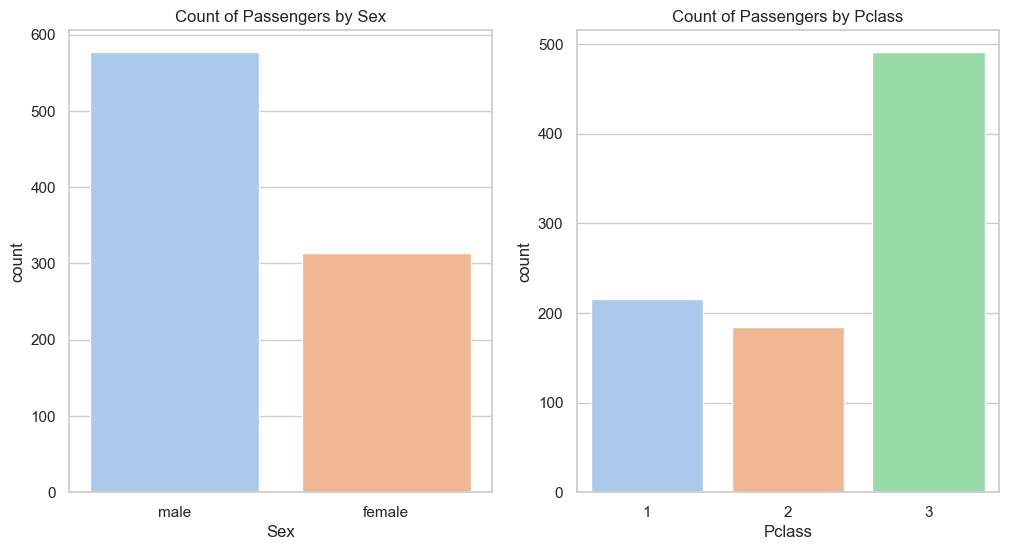

In [22]:


# Univariate analysis for categorical variables (e.g., 'Sex' and 'Pclass')
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(x='Sex', data=train_df, palette='pastel')
plt.title('Count of Passengers by Sex')

plt.subplot(1, 2, 2)
sns.countplot(x='Pclass', data=train_df, palette='pastel')
plt.title('Count of Passengers by Pclass')

plt.show()

# Correlation Analysis

C:\Users\Aditya\AppData\Local\Temp\ipykernel_9332\593886544.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = train_df.corr()


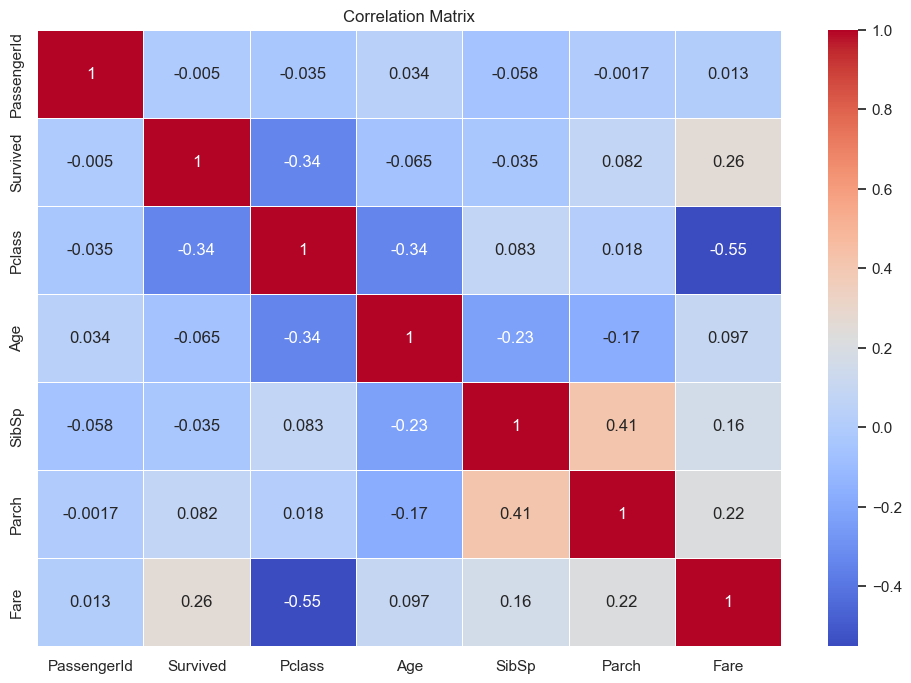

In [23]:
# Calculate the correlation matrix
correlation_matrix = train_df.corr()

# Create a heatmap to visualize correlations
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

# Survival Analysis

In [27]:
!pip install lifelines

  Obtaining dependency information for lifelines from https://files.pythonhosted.org/packages/b3/98/868d6b60a6a8847a53bca3b15b0e057fb3ed6395e5852f0c0c55bbaaa928/lifelines-0.28.0-py3-none-any.whl.metadata
  Obtaining dependency information for autograd>=1.5 from https://files.pythonhosted.org/packages/81/70/d5c7c2a458b8be96495c8b1634c2155beab58cbe864b7a9a5c06c2e52520/autograd-1.6.2-py3-none-any.whl.metadata
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Obtaining dependency information for formulaic>=0.2.2 from https://files.pythonhosted.org/packages/2c/09/7a9f95d35106d882f79ddabc2d33d8f2a262863f1f5d6fd00f46c5fc90aa/formulaic-1.0.1-py3-none-any.whl.metadata
  Obtaining dependency information for interface-meta>=1.2.0 from https://files.pythonhosted.org/packages/02/3f/a6ec28c88e2d8e54d32598a1e0b5208a4baa72a8e7f6e241beab5731eb9d/interface_meta-1.3.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/349.2 kB ?

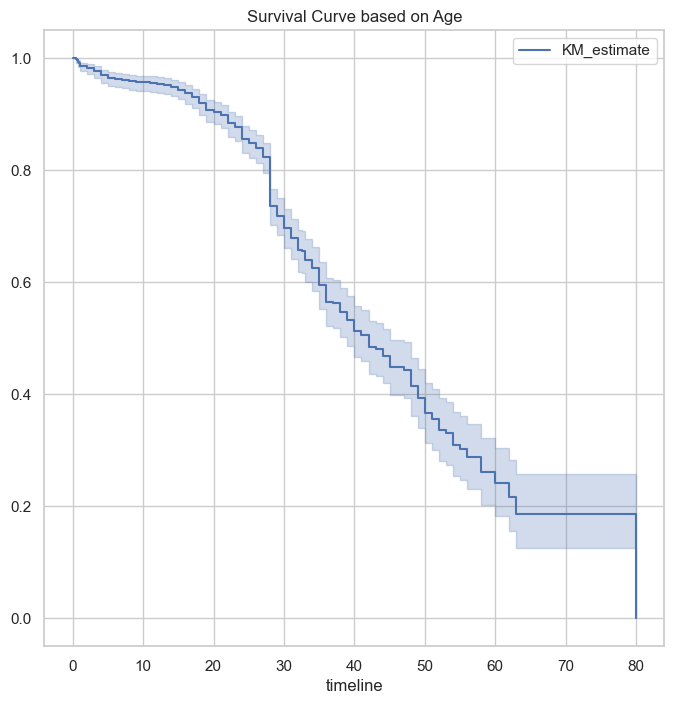

In [29]:
import lifelines
from lifelines import KaplanMeierFitter

# Create a Kaplan-Meier survival curve based on passenger class
kmf = KaplanMeierFitter()
kmf.fit(durations=train_df['Age'], event_observed=train_df['Survived'])
kmf.plot_survival_function()
plt.title('Survival Curve based on Age')
plt.show()

# Outlier Detection

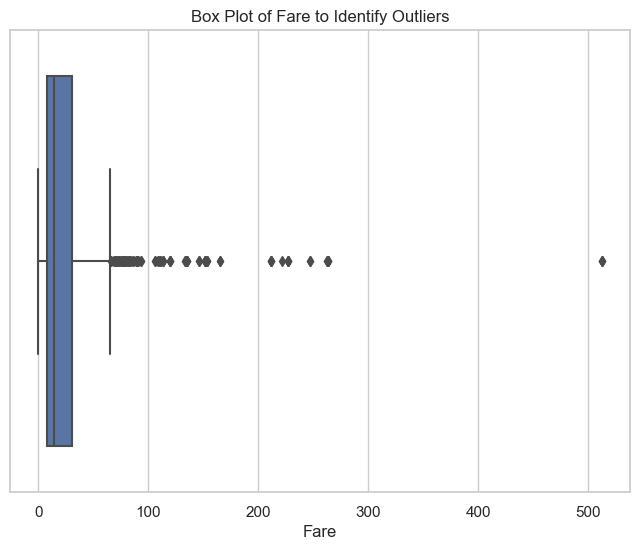

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example: Box plot to identify outliers in Fare
plt.figure(figsize=(8, 6))
sns.boxplot(x='Fare', data=train_df)
plt.title('Box Plot of Fare to Identify Outliers')
plt.show()


# Feature Importance

In [45]:
# Replace missing values in the 'Age' column with the median
median_age = train_df['Age'].median()
train_df.loc[train_df['Age'].isnull(), 'Age'] = median_age

# Drop non-numeric columns for simplicity (you might want to handle them differently)
columns_to_drop = ['Name', 'Ticket', 'Embarked']
if 'Cabin' in train_df.columns:
    columns_to_drop.append('Cabin')

train_df_numeric = train_df.drop(columns_to_drop, axis=1)

# Handle missing values if any
train_df_numeric.fillna(0, inplace=True)  # Replace missing values with 0 (this is just an example)

# Encode categorical variables (assuming 'Sex' is a categorical variable)
train_df_encoded = pd.get_dummies(train_df_numeric, columns=['Sex'], drop_first=True)

# Assuming 'Survived' is your target variable
X = train_df_encoded.drop('Survived', axis=1)
y = train_df_encoded['Survived']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the RandomForestClassifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.7988826815642458


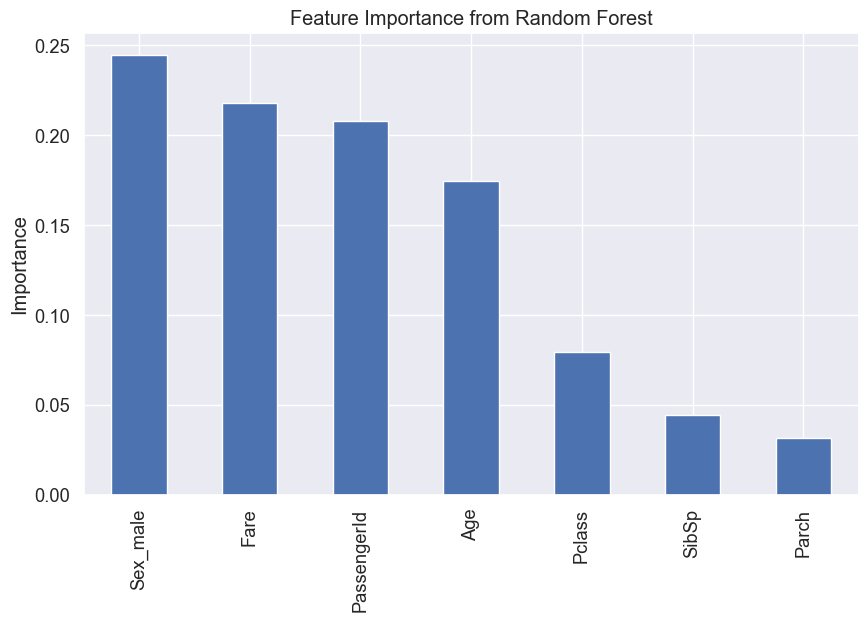

In [47]:

from sklearn.ensemble import RandomForestClassifier

# Drop non-numeric columns for simplicity (you might want to handle them differently)
train_df_numeric = train_df.drop(['Name', 'Ticket',  'Embarked'], axis=1)

# Handle missing values if any
train_df_numeric.fillna(0, inplace=True)  # Replace missing values with 0 (this is just an example)

# Encode categorical variables (assuming 'Sex' is a categorical variable)
train_df_encoded = pd.get_dummies(train_df_numeric, columns=['Sex'], drop_first=True)

# Assuming 'Survived' is your target variable
X = train_df_encoded.drop('Survived', axis=1)
y = train_df_encoded['Survived']

# Initialize and fit the RandomForestClassifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X, y)

# Display feature importances
feature_importances = pd.Series(rf_classifier.feature_importances_, index=X.columns)
feature_importances = feature_importances.sort_values(ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
feature_importances.plot(kind='bar')
plt.title('Feature Importance from Random Forest')
plt.ylabel('Importance')
plt.show()


# Hypothesis Testing

In [32]:
from scipy.stats import ttest_ind

# Example: T-test for comparing the 'Age' of male and female passengers
male_age = train_df[train_df['Sex'] == 'male']['Age'].dropna()
female_age = train_df[train_df['Sex'] == 'female']['Age'].dropna()

t_statistic, p_value = ttest_ind(male_age, female_age)
print(f'T-statistic: {t_statistic}, P-value: {p_value}')


T-statistic: 2.4279606481426024, P-value: 0.015381536989875313


In [49]:
class1_fare = train_df[train_df['Pclass'] == 1]['Fare'].dropna()
class2_fare = train_df[train_df['Pclass'] == 2]['Fare'].dropna()
class3_fare = train_df[train_df['Pclass'] == 3]['Fare'].dropna()

t_statistic_class, p_value_class = ttest_ind(class1_fare, class2_fare)
print(f'T-statistic for Class 1 vs Class 2 Fare: {t_statistic_class}, P-value: {p_value_class}')


T-statistic for Class 1 vs Class 2 Fare: 10.851594207309702, P-value: 3.303644173119574e-24


In [56]:
print('befor',train_df.shape,test_df.shape,combine[0].shape,combine[1].shape)
train_df=train_df.drop(['Ticket','Age'],axis=1)
test_df=test_df.drop(['Ticket','Age'],axis=1)
combine = [train_df, test_df]

print('After',train_df.shape,test_df.shape,combine[0].shape,combine[1].shape)



befor (891, 10) (418, 10) (891, 10) (418, 10)
After (891, 8) (418, 8) (891, 8) (418, 8)


In [51]:
for data in combine:
    data['Title']=  data['Title'] = data.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
pd.crosstab(train_df['Title'],train_df['Sex'])



Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [55]:
for dataset in combine:
    dataset['Title']=dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    
    dataset['Title']=dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train_df[['Title', 'Survived']].groupby(['Title'],as_index=False).mean()

,Title,Survived
0,1,0.156673
1,2,0.702703
2,3,0.793651
3,4,0.575000
4,5,0.347826


In [53]:
for data in combine:
    data['Title']=data['Title'].map(title_mapping)
    data['Title']=data['Title'].fillna(0)
    
train_df.head()

train_df=train_df.drop(['Name', 'PassengerId'],axis=1)
test_df=test_df.drop(['Name'],axis=1)
combine = [train_df, test_df]
train_df.shape, test_df.shape

for data in combine:
    data['Sex']=data['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,0,3,0,22.0,1,0,A/5 21171,7.2500,S,1
1,1,1,1,38.0,1,0,PC 17599,71.2833,C,3
2,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,S,2
3,1,1,1,35.0,1,0,113803,53.1000,S,3
4,0,3,0,35.0,0,0,373450,8.0500,S,1


In [68]:
guess_ages=np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

In [70]:
print(dataset.columns)


Index(['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked',
       'Title'],
      dtype='object')


# Create new feature combining existing features

In [74]:
for dataset in combine:
    dataset['FamilySize']=dataset['SibSp'] + dataset['Parch'] + 1

train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived',ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


<Axes: xlabel='FamilySize', ylabel='Survived'>

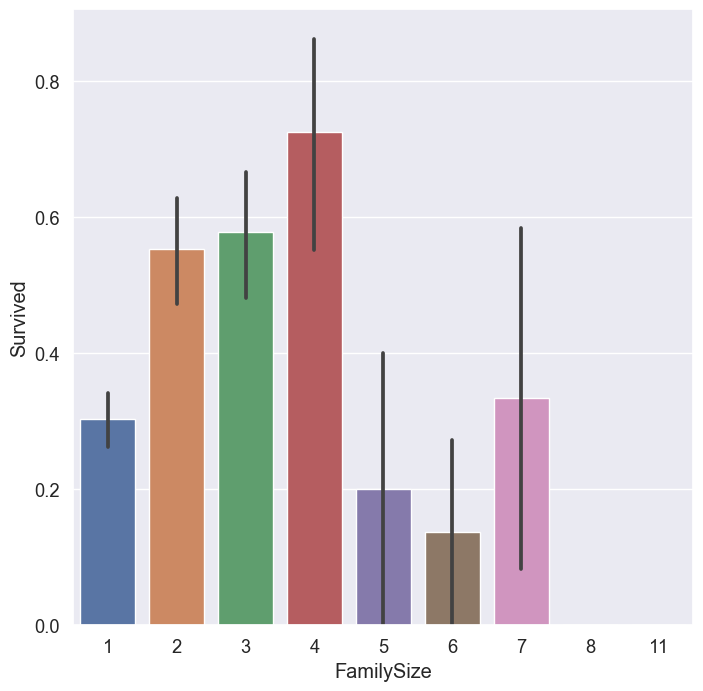

In [75]:
sns.barplot(x='FamilySize',y='Survived',data=train_df)

<Axes: ylabel='count'>

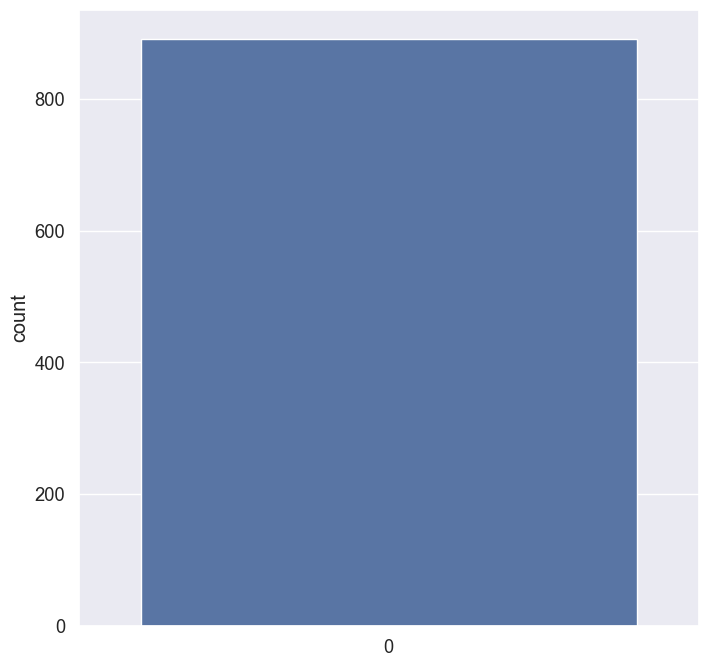

In [76]:
sns.countplot(train_df['FamilySize'])

# Completing a categorical feature

In [77]:
spot=train_df.Embarked.dropna().mode()[0]
for dataset in combine:
    dataset['Embarked']=dataset['Embarked'].fillna(spot)
train_df[['Embarked','Survived']].groupby('Embarked' ,as_index=False).mean().sort_values(by='Survived',ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


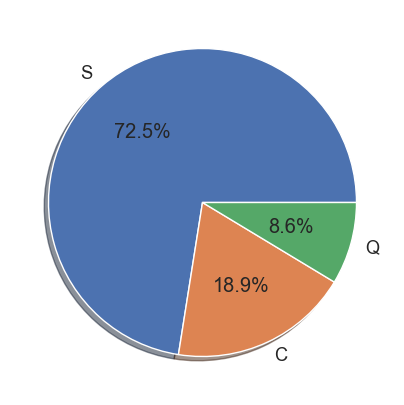

In [78]:
sns.set(rc={'figure.figsize': [5, 5]}, font_scale=1.2)
plt.pie(train_df['Embarked'].value_counts(),labels=('S','C','Q'),autopct ='%1.1f%%',shadow=True)
       
plt.show() 

In [79]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
for dataset in combine:
    dataset['Embarked']=le.fit_transform(dataset['Embarked'])
dataset['Embarked'].unique()
#s:1 , c:2 ,q:0
data

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,892,3,0,34.5,0,0,330911,7.8292,Q,1
1,893,3,1,47.0,1,0,363272,7.0000,S,3
2,894,2,0,62.0,0,0,240276,9.6875,Q,1
3,895,3,0,27.0,0,0,315154,8.6625,S,1
4,896,3,1,22.0,1,1,3101298,12.2875,S,3
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,0,27.0,0,0,A.5. 3236,8.0500,S,1
414,1306,1,1,39.0,0,0,PC 17758,108.9000,C,5
415,1307,3,0,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S,1
416,1308,3,0,27.0,0,0,359309,8.0500,S,1


In [80]:
train_df['Fare'].fillna(train_df['Fare'].dropna().median(),inplace=True)
train_df.sample(10)

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Title,FamilySize
318,1,1,1,0,2,164.8667,2,2,3
381,1,3,1,0,2,15.7417,0,2,3
728,0,2,0,1,0,26.0000,2,1,2
152,0,3,0,0,0,8.0500,2,1,1
116,0,3,0,0,0,7.7500,1,1,1
348,1,3,0,1,1,15.9000,2,4,3
0,0,3,0,1,0,7.2500,2,1,2
399,1,2,1,0,0,12.6500,2,3,1
444,1,3,0,0,0,8.1125,2,1,1
494,0,3,0,0,0,8.0500,2,1,1


In [81]:
train_df['Fare'] = train_df['Fare'].astype(int)
train_df['Fare'] 

0       7
1      71
2       7
3      53
4       8
       ..
886    13
887    30
888    23
889    30
890     7
Name: Fare, Length: 891, dtype: int32

<Axes: xlabel='Survived', ylabel='Fare'>

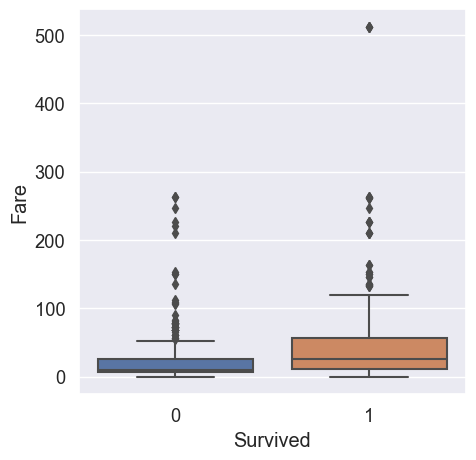

In [82]:
sns.boxplot(x="Survived", y="Fare", data=train_df)

In [83]:
train_df['fareBand']=pd.qcut(train_df['Fare'], 4)
train_df[['fareBand','Survived']].groupby('fareBand',as_index=False).mean().sort_values(by='fareBand',ascending=True)

,fareBand,Survived
0,"(-0.001, 7.0]",0.215768
1,"(7.0, 14.0]",0.287037
2,"(14.0, 31.0]",0.457399
3,"(31.0, 512.0]",0.597156


In [84]:
for dataset in combine:
    dataset['Fare'].fillna(dataset['Fare'].dropna().median(),inplace=True)
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    
    #dataset['Fare'] = dataset['Fare'].astype(int)
train_df['Fare'] = train_df['Fare'].astype(int)
train_df = train_df.drop(['fareBand'], axis=1)
combine = [train_df, test_df]
        

train_df['Fare'].value_counts()

0    241
2    223
1    216
3    211
Name: Fare, dtype: int64

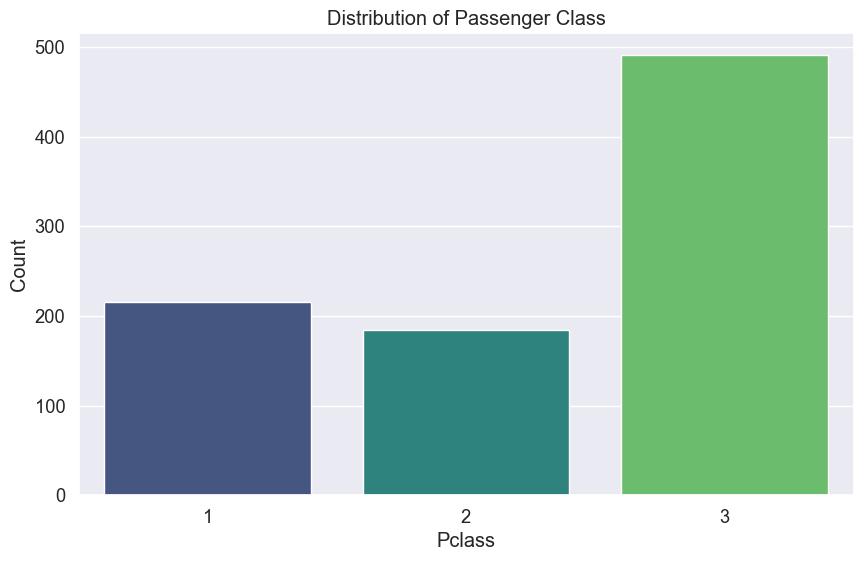

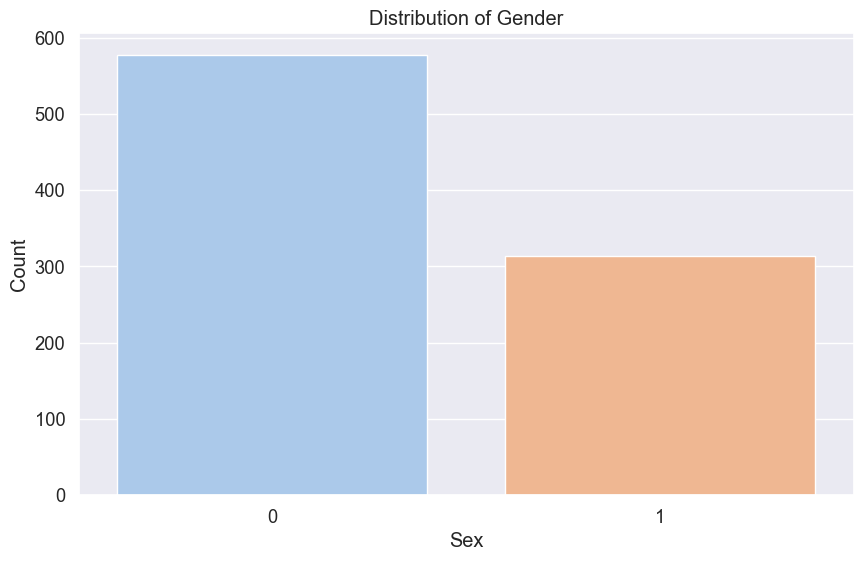

In [86]:
# Bar plot for Pclass
plt.figure(figsize=(10, 6))
sns.countplot(x='Pclass', data=train_df, palette='viridis')
plt.title('Distribution of Passenger Class')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.show()

# Bar plot for Sex
plt.figure(figsize=(10, 6))
sns.countplot(x='Sex', data=train_df, palette='pastel')
plt.title('Distribution of Gender')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()


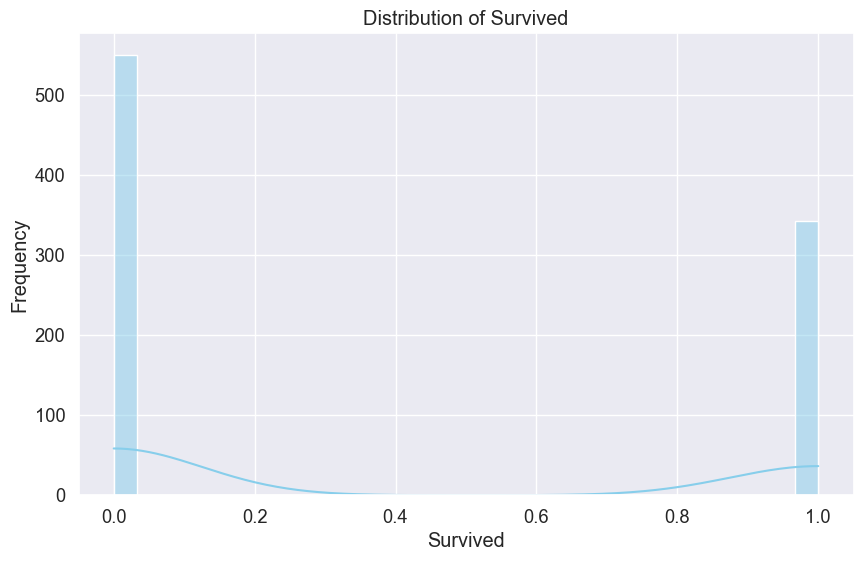

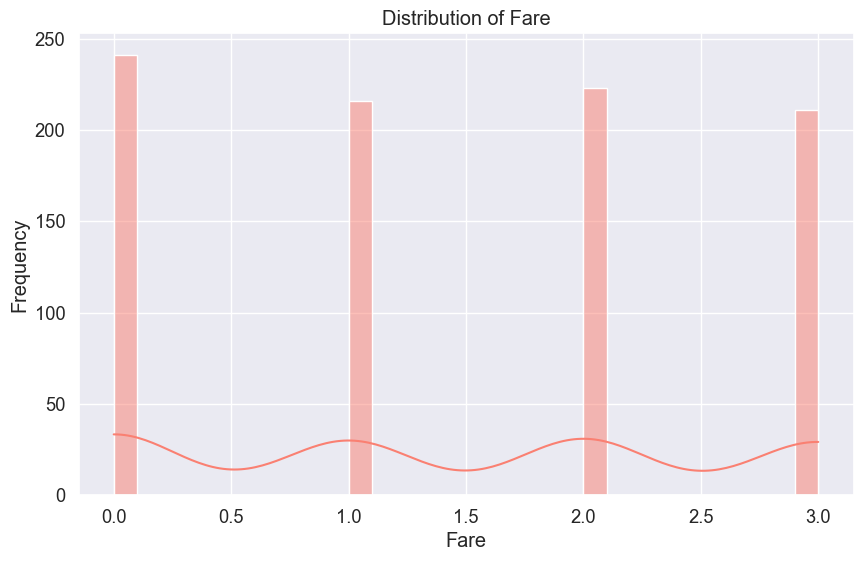

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for Age
plt.figure(figsize=(10, 6))
sns.histplot(train_df['Survived'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Survived')
plt.xlabel('Survived')
plt.ylabel('Frequency')
plt.show()

# Histogram for Fare
plt.figure(figsize=(10, 6))
sns.histplot(train_df['Fare'], bins=30, kde=True, color='salmon')
plt.title('Distribution of Fare')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()


In [95]:
import plotly.express as px

# Distribution of Fare
fig_fare = px.histogram(train_df, x='Fare', nbins=30, title='Distribution of Fare')
fig_fare.update_layout(xaxis_title='Fare', yaxis_title='Frequency')
fig_fare.show()

# Distribution of Passenger Class
fig_pclass = px.bar(train_df, x='Pclass', title='Distribution of Passenger Class')
fig_pclass.update_layout(xaxis_title='Pclass', yaxis_title='Count')
fig_pclass.show()

# Distribution of Gender
fig_gender = px.bar(train_df, x='Sex', title='Distribution of Gender')
fig_gender.update_layout(xaxis_title='Sex', yaxis_title='Count')
fig_gender.show()



